###STFT(Short Term Fourier Transformation)



*   시계열 정보에 시간 정보 반영
*   **신호의 일정 구간마다(window) Fast 푸리에 변환(FFT)을 하는 것**
*   반환 값의 형태는 2차원 matrix


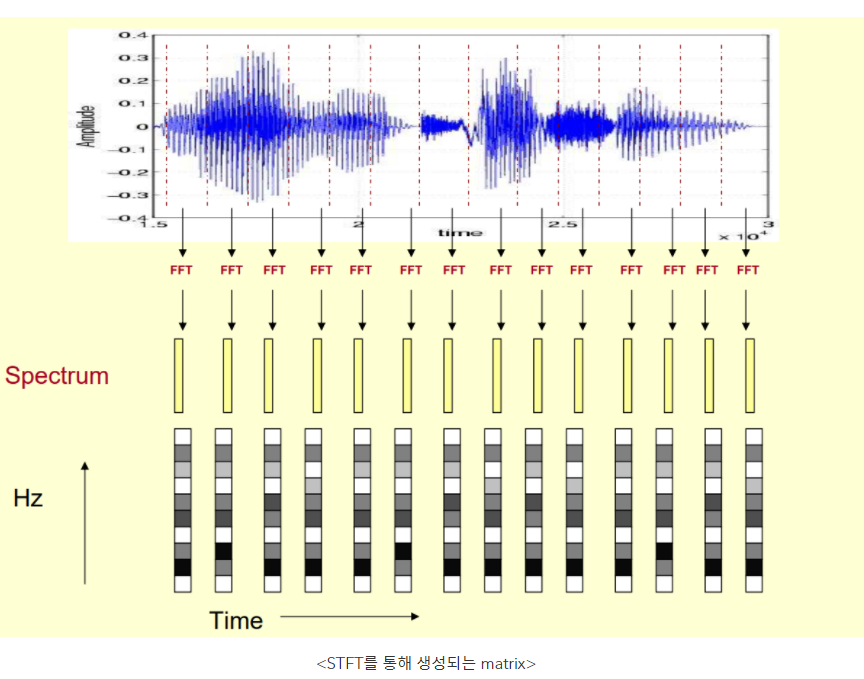




In [ ]:
import librosa
import librosa.display
import numpy as np
import scipy.io

audio_path3='/content/drive/MyDrive/Colab Notebooks/외주/voice_phishing6.wav'
sr = librosa.get_samplerate(audio_path3)
#48,000hz
stream = librosa.stream(audio_path3,block_length=1024,frame_length=2048,hop_length=1024)
#frame_length= 프레임당 sample수 / block_length=각 블록에 포함 할 프레임 수
for y in stream:
    stft_result = librosa.stft(y, n_fft=2048, hop_length=1024,center=False)
    D = np.abs(stft_result) # 복소공간 값 절댓값 취하기
    np.save('Abs_stft4',D)
    loaded_abs_stft = np.load('/content/Abs_stft4.npy')
    mystft = loaded_abs_stft
    scipy.io.savemat('abs_stft4.mat',{"foo4":mystft}) #matlab 파일로 저장
    #print(D)


In [ ]:
D.shape #reshape 전(1025, 962)

(1025, 962)

In [ ]:
D = np.array(D)

row,col = D.shape
D = np.reshape(D, (1,row*col))
#D.shape #(1, 986050)
np.save('Abs_stft4_reshape',D)
loaded_abs_stft = np.load('/content/Abs_stft4_reshape.npy')
mystft2 = loaded_abs_stft
scipy.io.savemat('abs_stft4_reshape.mat',{"foo4_reshape":mystft2}) #matlab 파일로 저장

##MFCC (Mel Frequency Cepstral Coefficient)



*   압축하는 과정에서 손실이 발생, 노이즈가 제거되는 효과

   **DCT (Discrete Cosine Transform)를 거쳐 나온 결과값**



  ex) 주파수 값 = 1000개, sr = 44,100hz == 초당 44,100 점을 찍어 만든 데이터

--> 주파수 분석후 초당 1000개로 표현 가능(RAW데이터 1000개)로 축소
--> 다시 40개로 축소


---

###Mel filter bank



*   frequency 차원의 수 줄여 데이터 용량 작게
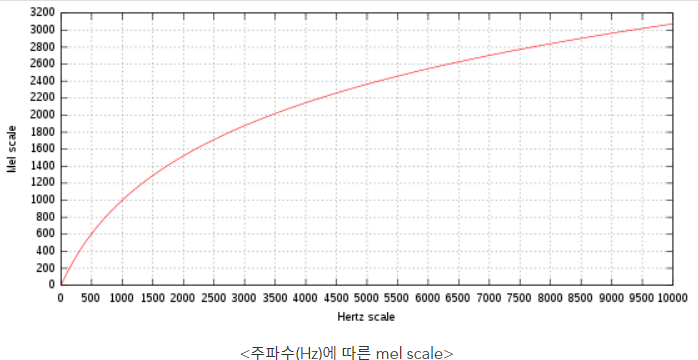















*   STFT를 통해 생성된 matrix의 frequency 축에 mel filter bank추가


> (낮은 주파수 대역에서 더 세밀하게 정보 압축)







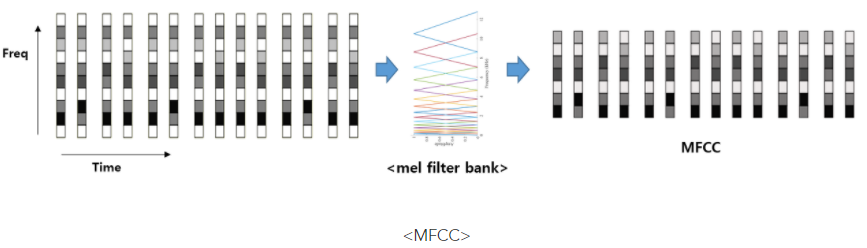




[[-1.13056299e+03 -1.06444495e+03 -1.01896375e+03 -1.03106702e+03 -1.06253528e+03 -1.10929077e+03 -1.09307092e+03 -1.06202234e+03 -1.05541602e+03 -1.05190417e+03 -1.06006311e+03 -1.05293567e+03 -1.04977148e+03 -1.05516968e+03 -1.05100867e+03 -1.04932141e+03 -1.05106824e+03 -6.55027954e+02 -7.63943054e+02 -1.01470056e+03 -9.91439758e+02 -9.43270447e+02 -9.60658569e+02 -9.75091187e+02 -1.00019836e+03 -1.03563232e+03 -1.08994653e+03 -1.12529102e+03 -1.12142468e+03 -9.03260193e+02 -9.53190125e+02 -1.02326471e+03 -1.02056677e+03 -9.69284363e+02 -9.54059204e+02 -9.60313843e+02 -9.57174744e+02 -9.57543152e+02 -9.37299377e+02 -9.66698914e+02 -9.70230530e+02 -9.68540588e+02 -9.81136780e+02 -9.86862122e+02 -9.83636108e+02 -9.92211853e+02 -1.00872156e+03 -1.02407520e+03 -1.00754462e+03 -9.72771301e+02 -9.67870056e+02 -9.87861877e+02 -1.00426465e+03 -1.01119763e+03 -9.96647644e+02 -1.00711163e+03 -1.01180176e+03 -1.00092657e+03 -9.97331299e+02 -1.00262451e+03 -9.97434326e+02 -1.00230994e+03 -9.988

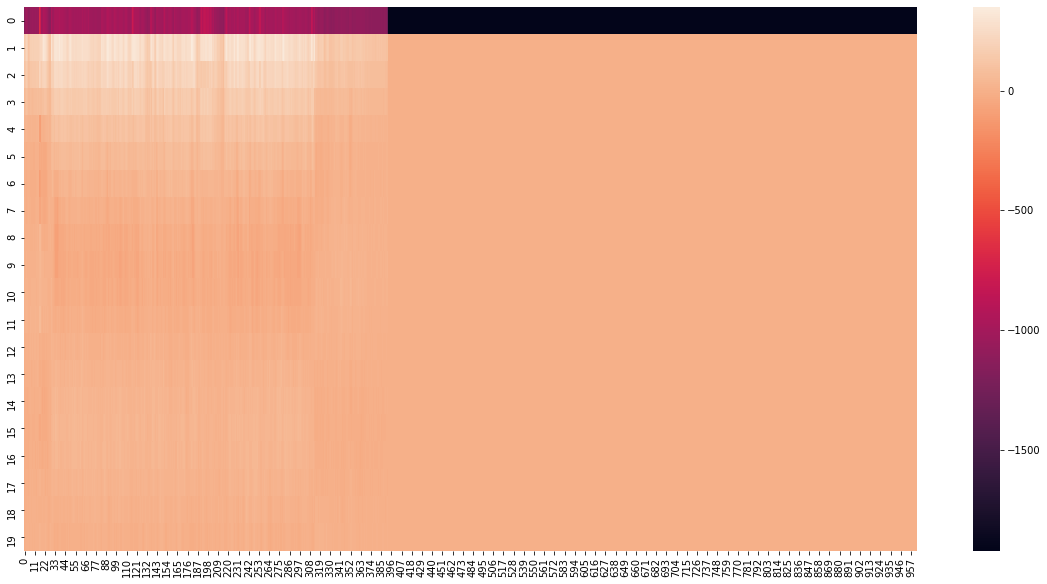

In [ ]:
#MFCC
import matplotlib.pyplot as plt
import seaborn as sns
D = np.abs(librosa.stft(y, n_fft = 2048, win_length = 2048, hop_length = 1024))
#librosa.feature.mfcc(y=None, ,S=None, n_mfcc=20, dct_type=2, norm='ortho', lifter=0, **kwargs)
# y = 오디오 시계열 , S = log-power Mel spectrogram 
# n_mfcc = number of MFCCs to return, 압축을 얼마나 할지에 관한 계수
# dct_type = Discrete cosine transform (DCT) type. By default, DCT type-2 is used.
# lifter = (lifter>0)인 경우 계수는 선형에 가까워 진다
# (lifter>0) M[n, :] <- M[n, :] * (1 + sin(pi * (n + 1) / lifter)) * lifter / 2
mfcc = librosa.feature.mfcc(S = librosa.power_to_db(D), sr = sr, n_mfcc = 20)
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(mfcc)
np.set_printoptions(threshold=np.inf, linewidth=np.inf) #생략되는 부분 까지 출력
print(mfcc)

In [ ]:
np.save('mfcc2',mfcc)

In [ ]:
loaded_mfcc = np.load('/content/mfcc2.npy')

In [ ]:
import scipy.io
mymfcc = loaded_mfcc
scipy.io.savemat('mfcc2.mat',{"foo":mymfcc})

In [ ]:
mfcc = np.array(mfcc)

row,col = mfcc.shape
mfcc = np.reshape(mfcc, (1,row*col))
#D.shape #(1, 986050)
np.save('mfcc_reshape',mfcc)
loaded_abs_stft = np.load('/content/mfcc_reshape.npy')
mystft3 = loaded_abs_stft
scipy.io.savemat('mfcc_reshape.mat',{"mfcc_reshape":mystft3}) #matlab 파일로 저장

In [ ]:
print(mfcc)

[[-1.13056299e+03 -1.06444495e+03 -1.01896375e+03 -1.03106702e+03 -1.06253528e+03 -1.10929077e+03 -1.09307092e+03 -1.06202234e+03 -1.05541602e+03 -1.05190417e+03 -1.06006311e+03 -1.05293567e+03 -1.04977148e+03 -1.05516968e+03 -1.05100867e+03 -1.04932141e+03 -1.05106824e+03 -6.55027954e+02 -7.63943054e+02 -1.01470056e+03 -9.91439758e+02 -9.43270447e+02 -9.60658569e+02 -9.75091187e+02 -1.00019836e+03 -1.03563232e+03 -1.08994653e+03 -1.12529102e+03 -1.12142468e+03 -9.03260193e+02 -9.53190125e+02 -1.02326471e+03 -1.02056677e+03 -9.69284363e+02 -9.54059204e+02 -9.60313843e+02 -9.57174744e+02 -9.57543152e+02 -9.37299377e+02 -9.66698914e+02 -9.70230530e+02 -9.68540588e+02 -9.81136780e+02 -9.86862122e+02 -9.83636108e+02 -9.92211853e+02 -1.00872156e+03 -1.02407520e+03 -1.00754462e+03 -9.72771301e+02 -9.67870056e+02 -9.87861877e+02 -1.00426465e+03 -1.01119763e+03 -9.96647644e+02 -1.00711163e+03 -1.01180176e+03 -1.00092657e+03 -9.97331299e+02 -1.00262451e+03 -9.97434326e+02 -1.00230994e+03 -9.988